In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Yosef/OneDrive/Documents/vehicles.csv",sep = ',',encoding='ISO-8859-1')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.shape

(426880, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# check null values
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

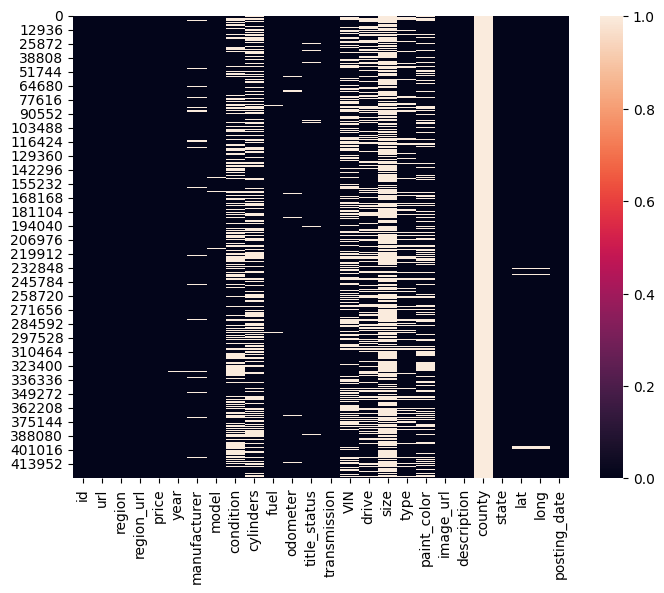

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

In [7]:
df = df.drop(columns=['county'])

Here We have deleted The column {county} as all it's values is null

In [8]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [9]:
df.duplicated().sum()

np.int64(0)

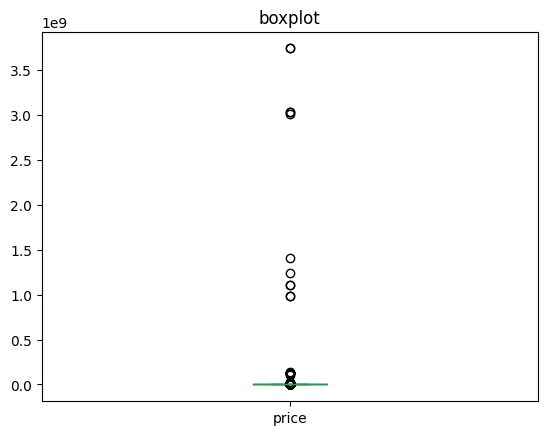

In [10]:
ax = df[['price']].plot(kind='box', title='boxplot')
plt.show()

In [1]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Outliers:")
print(outliers)
print("Data without outliers:")
print(df)


NameError: name 'df' is not defined

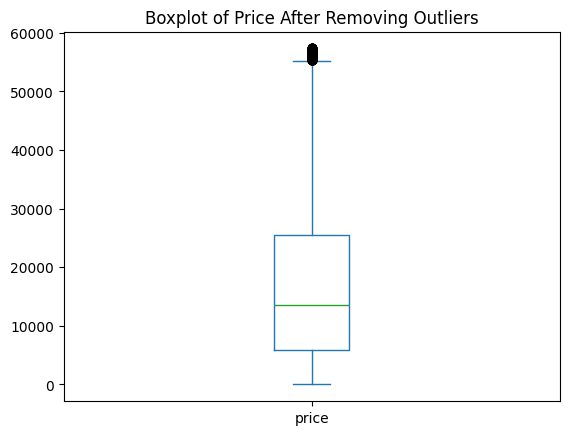

In [12]:
ax = df[['price']].plot(kind='box', title='Boxplot of Price After Removing Outliers')
plt.show()


In [13]:
num_rows = df['price'].count()
print(f"Number of rows in 'price' column after removing outliers: {num_rows}")


Number of rows in 'price' column after removing outliers: 418703


In [ ]:
df['year'] = df['year'].astype('Int64')  

df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

df['price'] = df['price'].astype('int64')


df['odometer'] = df['odometer'].astype('float64')

print(df.dtypes)


id                int64
url              object
region           object
region_url       object
price             int64
year              Int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object


C:\Users\Yosef\AppData\Local\Temp\ipykernel_15652\2432416978.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')


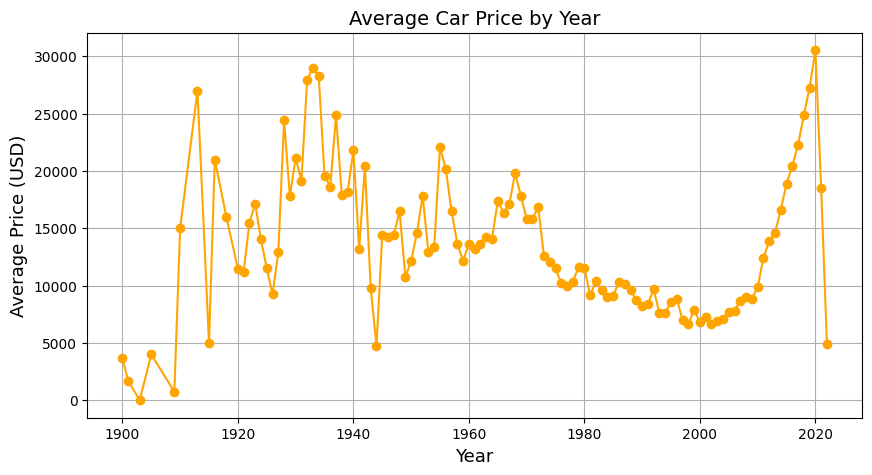

In [ ]:
avg_price_by_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(10, 5), dpi=100)
avg_price_by_year.plot(kind='line', color='orange', marker='o')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average Price (USD)', fontsize=13)
plt.title('Average Car Price by Year', fontsize=14)
plt.grid(True)
plt.show()


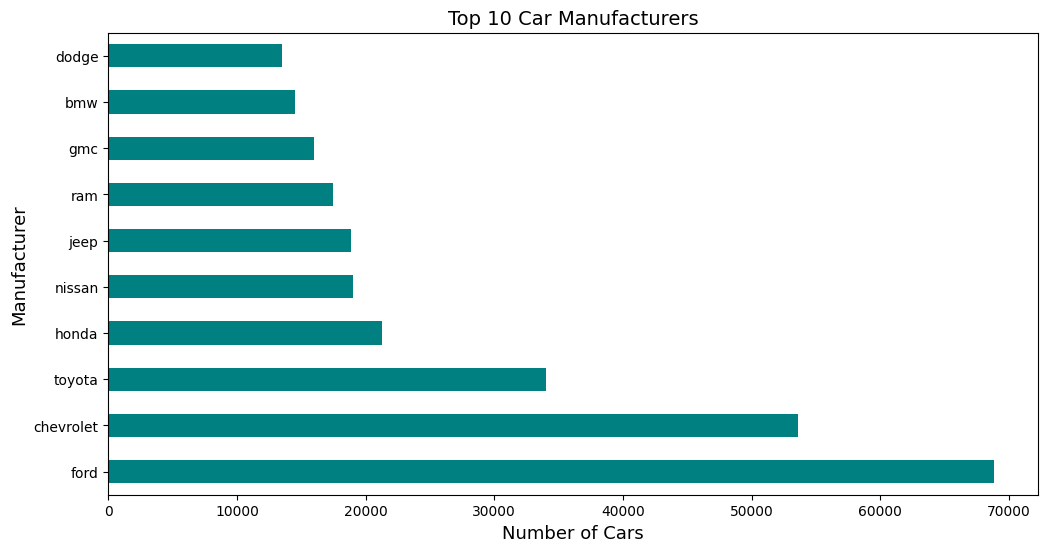

In [ ]:
manufacturer_count = df['manufacturer'].value_counts().head(10)  

plt.figure(figsize=(12, 6), dpi=100)
manufacturer_count.plot(kind='barh', color='teal')
plt.xlabel('Number of Cars', fontsize=13)
plt.ylabel('Manufacturer', fontsize=13)
plt.title('Top 10 Car Manufacturers', fontsize=14)
plt.show()


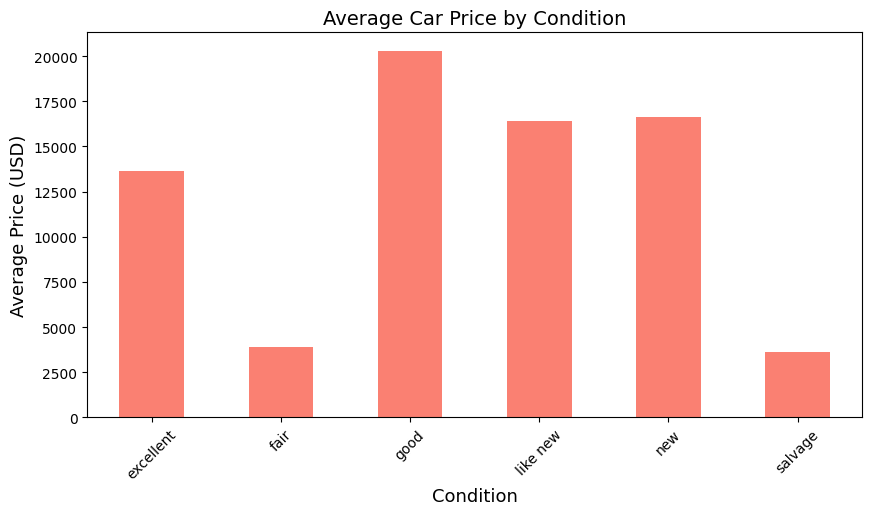

In [ ]:
avg_price_by_condition = df.groupby('condition')['price'].mean()

plt.figure(figsize=(10, 5), dpi=100)
avg_price_by_condition.plot(kind='bar', color='salmon')
plt.xlabel('Condition', fontsize=13)
plt.ylabel('Average Price (USD)', fontsize=13)
plt.title('Average Car Price by Condition', fontsize=14)
plt.xticks(rotation=45)
plt.show()


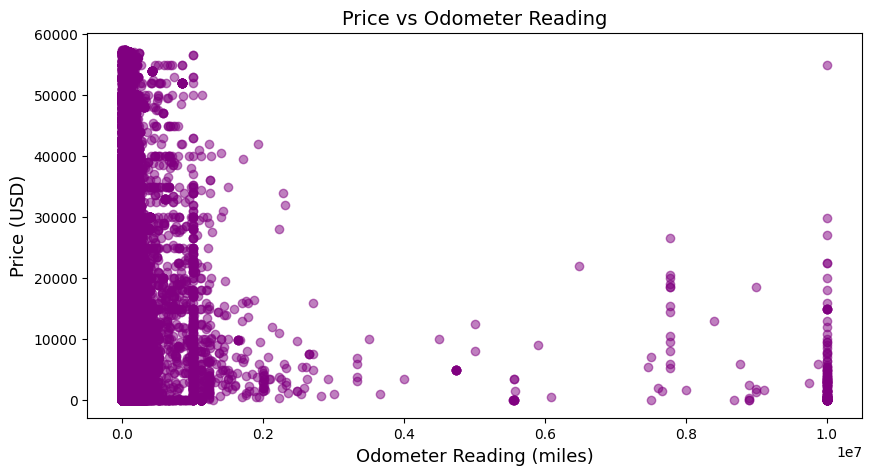

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df['odometer'], df['price'], alpha=0.5, color='purple')
plt.xlabel('Odometer Reading (miles)', fontsize=13)
plt.ylabel('Price (USD)', fontsize=13)
plt.title('Price vs Odometer Reading', fontsize=14)
plt.show()


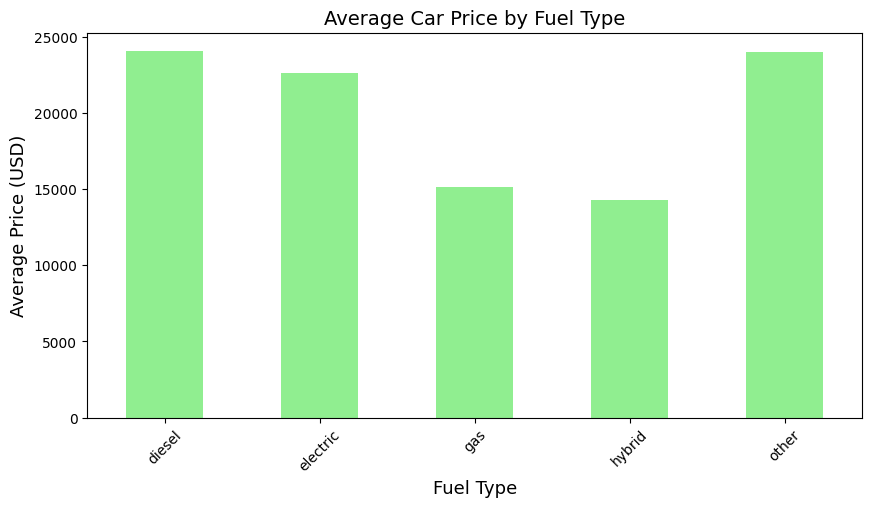

In [ ]:
avg_price_by_fuel = df.groupby('fuel')['price'].mean()

plt.figure(figsize=(10, 5), dpi=100)
avg_price_by_fuel.plot(kind='bar', color='lightgreen')
plt.xlabel('Fuel Type', fontsize=13)
plt.ylabel('Average Price (USD)', fontsize=13)
plt.title('Average Car Price by Fuel Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()


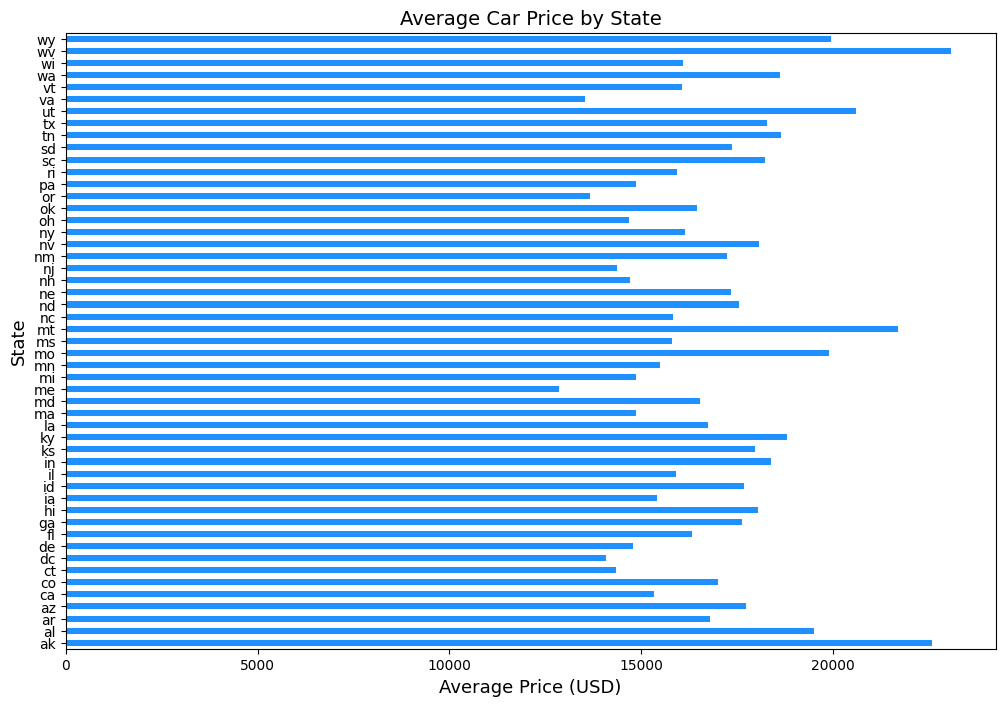

In [ ]:
avg_price_by_state = df.groupby('state')['price'].mean()

plt.figure(figsize=(12, 8), dpi=100)
avg_price_by_state.plot(kind='barh', color='dodgerblue')  
plt.xlabel('Average Price (USD)', fontsize=13)  
plt.ylabel('State', fontsize=13) 
plt.title('Average Car Price by State', fontsize=14)  
plt.show()  


C:\Users\Yosef\AppData\Local\Temp\ipykernel_15652\148678072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df, palette='Set2')  # Boxplot for price by transmission type


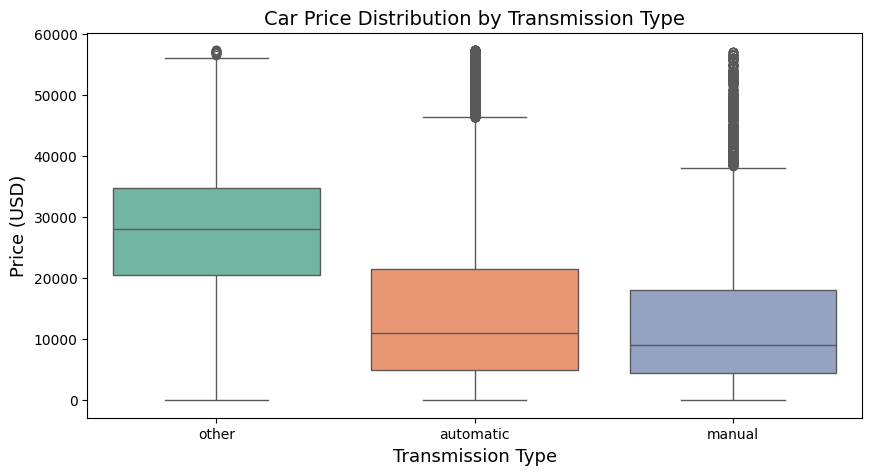

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
sns.boxplot(x='transmission', y='price', data=df, palette='Set2')  
plt.xlabel('Transmission Type', fontsize=13)  
plt.ylabel('Price (USD)', fontsize=13)  
plt.title('Car Price Distribution by Transmission Type', fontsize=14) 
plt.show()  


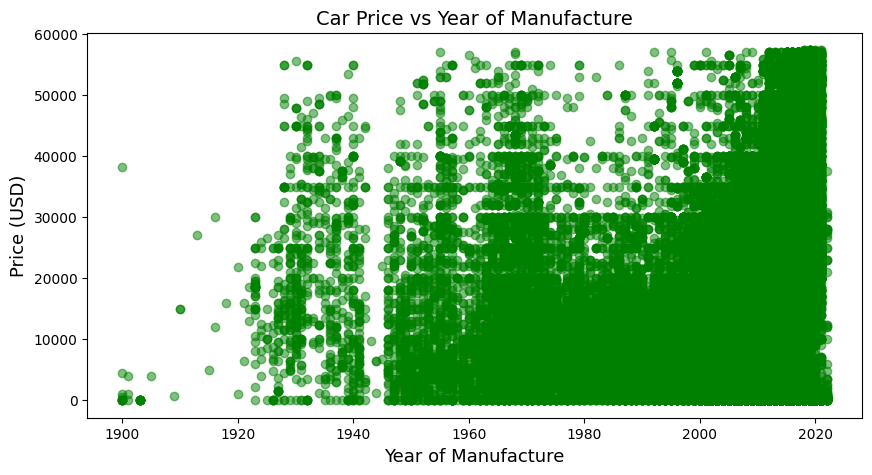

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df['year'], df['price'], alpha=0.5, color='green')  
plt.xlabel('Year of Manufacture', fontsize=13)  
plt.ylabel('Price (USD)', fontsize=13)
plt.title('Car Price vs Year of Manufacture', fontsize=14)  
plt.show()  


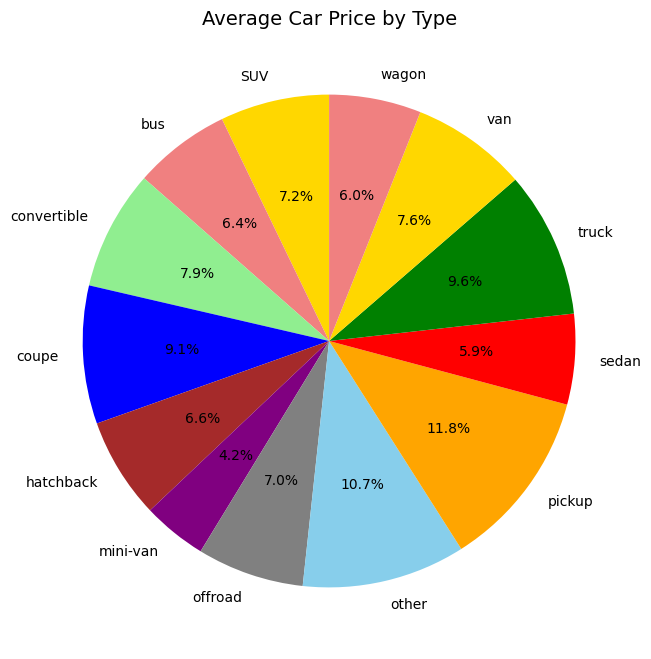

In [ ]:
avg_price_by_type = df.groupby('type')['price'].mean()

plt.figure(figsize=(8, 8), dpi=100)
avg_price_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightgreen','blue','brown','purple','grey','skyblue','orange','red','green']) 
plt.title('Average Car Price by Type', fontsize=14)  
plt.ylabel('')  
plt.show()  


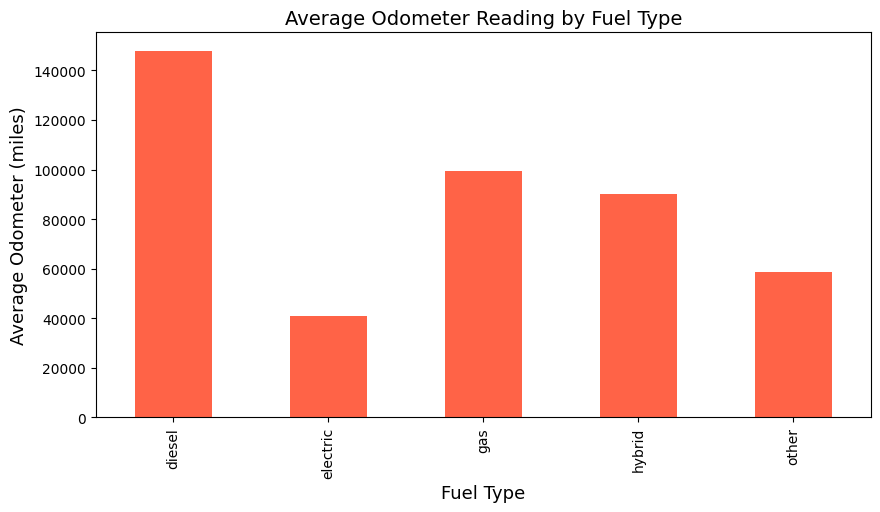

In [ ]:
avg_odometer_by_fuel = df.groupby('fuel')['odometer'].mean()

plt.figure(figsize=(10, 5), dpi=100)
avg_odometer_by_fuel.plot(kind='bar', color='tomato')  
plt.xlabel('Fuel Type', fontsize=13) 
plt.ylabel('Average Odometer (miles)', fontsize=13)  
plt.title('Average Odometer Reading by Fuel Type', fontsize=14)  
plt.show()  

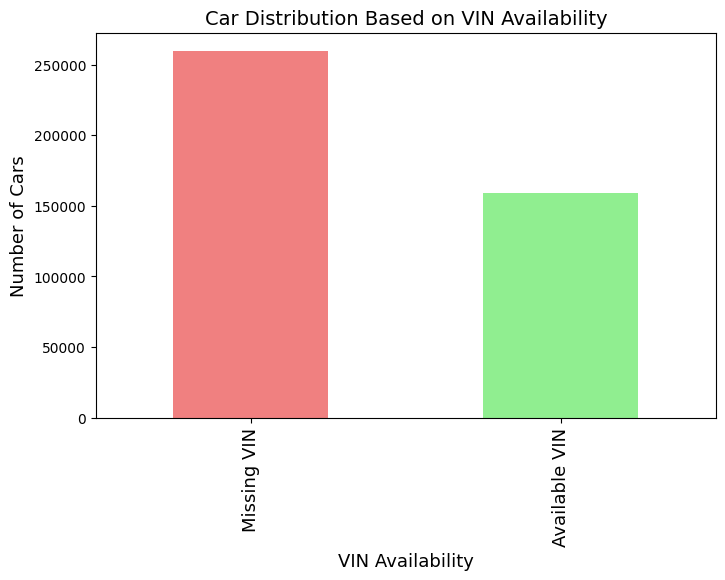

In [ ]:
vin_counts = df['VIN'].isnull().value_counts()

plt.figure(figsize=(8, 5), dpi=100)
vin_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])  
plt.xticks([0, 1], ['Missing VIN', 'Available VIN'], fontsize=13)  
plt.xlabel('VIN Availability', fontsize=13)  
plt.ylabel('Number of Cars', fontsize=13) 
plt.title('Car Distribution Based on VIN Availability', fontsize=14)  
plt.show()  


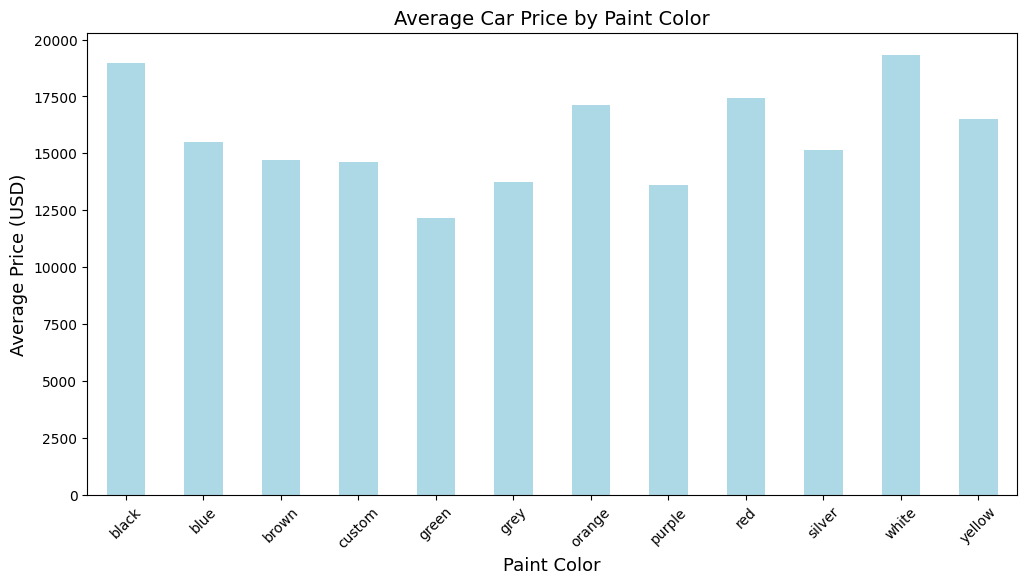

In [ ]:
avg_price_by_color = df.groupby('paint_color')['price'].mean()

plt.figure(figsize=(12, 6), dpi=100)
avg_price_by_color.plot(kind='bar', color='lightblue')  
plt.xlabel('Paint Color', fontsize=13)  
plt.ylabel('Average Price (USD)', fontsize=13)  
plt.title('Average Car Price by Paint Color', fontsize=14) 
plt.xticks(rotation=45)  
plt.show()  


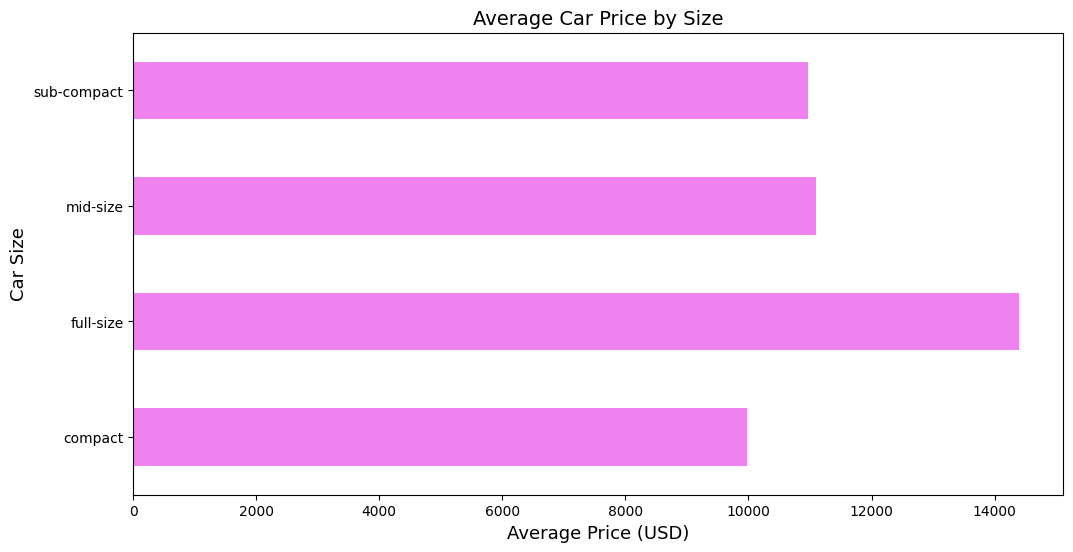

In [ ]:
avg_price_by_size = df.groupby('size')['price'].mean()

plt.figure(figsize=(12, 6), dpi=100)
avg_price_by_size.plot(kind='barh', color='violet')  
plt.xlabel('Average Price (USD)', fontsize=13)  
plt.ylabel('Car Size', fontsize=13)  
plt.title('Average Car Price by Size', fontsize=14) 
plt.show()  


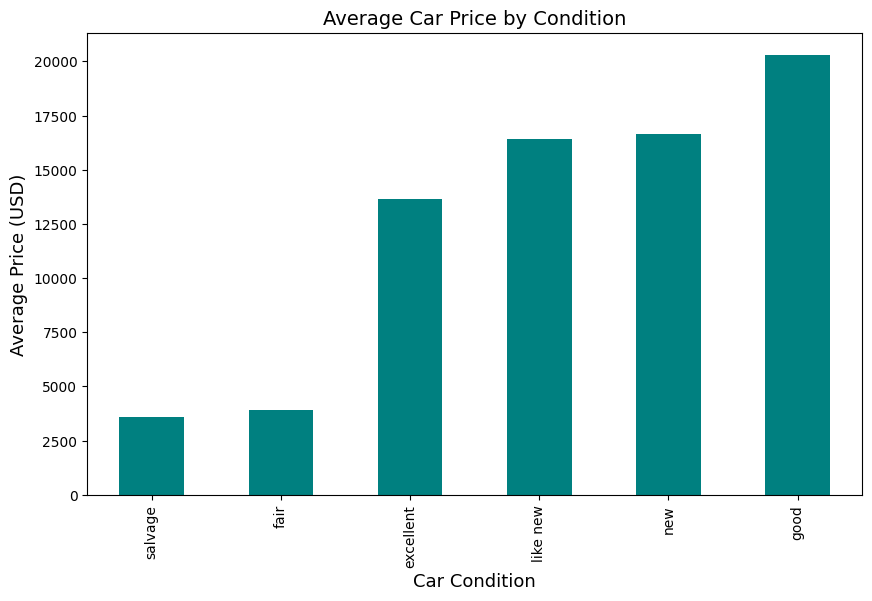

In [ ]:
avg_price_by_condition = df.groupby('condition')['price'].mean()

plt.figure(figsize=(10, 6), dpi=100)
avg_price_by_condition.sort_values().plot(kind='bar', color='teal')
plt.xlabel('Car Condition', fontsize=13)
plt.ylabel('Average Price (USD)', fontsize=13)
plt.title('Average Car Price by Condition', fontsize=14)
plt.show()


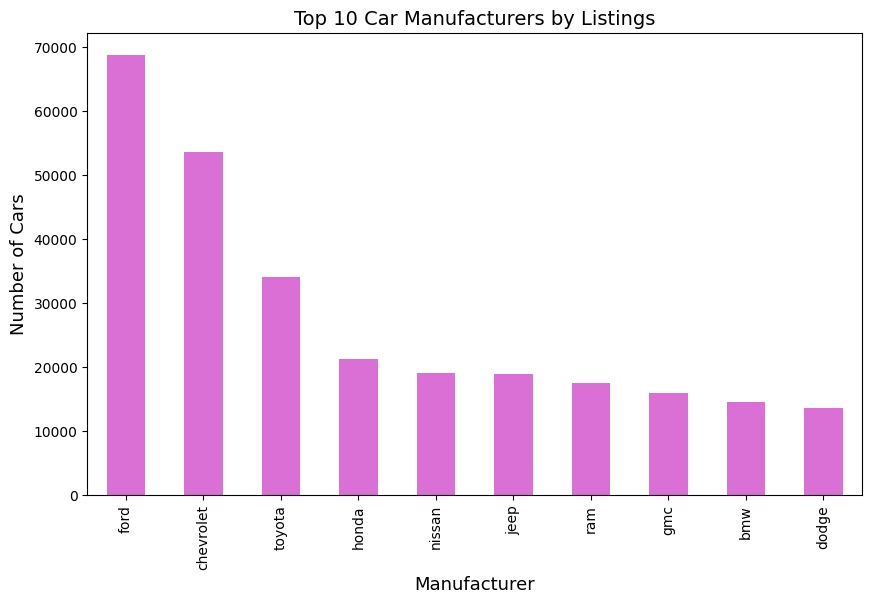

In [ ]:

manufacturer_count = df['manufacturer'].value_counts().head(10)

plt.figure(figsize=(10, 6), dpi=100)
manufacturer_count.plot(kind='bar', color='orchid')
plt.xlabel('Manufacturer', fontsize=13)
plt.ylabel('Number of Cars', fontsize=13)
plt.title('Top 10 Car Manufacturers by Listings', fontsize=14)
plt.show()


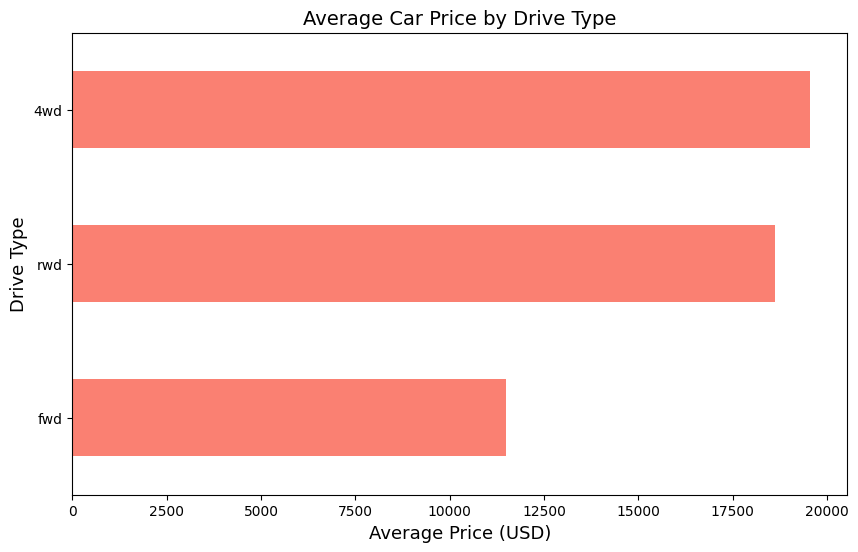

In [31]:
avg_price_by_drive = df.groupby('drive')['price'].mean()

plt.figure(figsize=(10, 6), dpi=100)
avg_price_by_drive.sort_values().plot(kind='barh', color='salmon')
plt.xlabel('Average Price (USD)', fontsize=13)
plt.ylabel('Drive Type', fontsize=13)
plt.title('Average Car Price by Drive Type', fontsize=14)
plt.show()


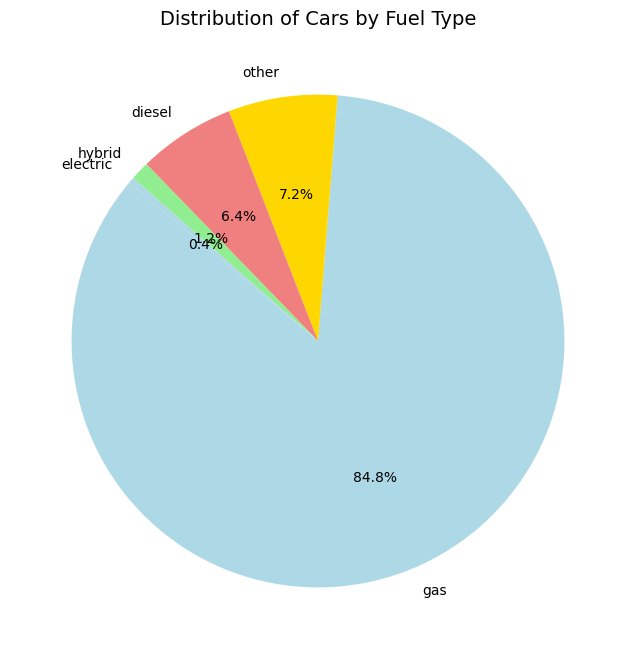

In [32]:
fuel_type_count = df['fuel'].value_counts()

plt.figure(figsize=(8, 8), dpi=100)
fuel_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'gold', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Cars by Fuel Type', fontsize=14)
plt.ylabel('')
plt.show()


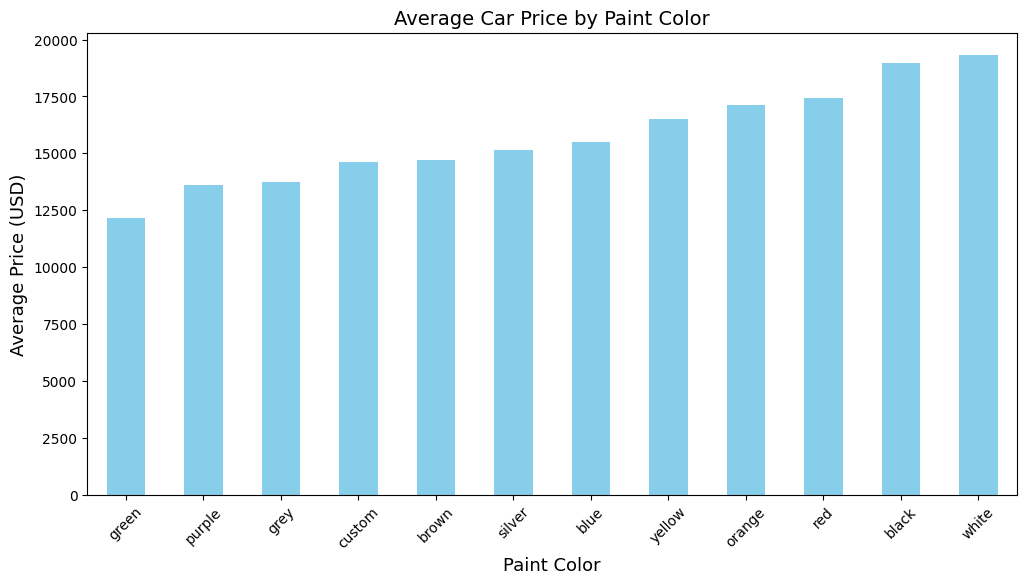

In [33]:
avg_price_by_color = df.groupby('paint_color')['price'].mean()

plt.figure(figsize=(12, 6), dpi=100)
avg_price_by_color.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Paint Color', fontsize=13)
plt.ylabel('Average Price (USD)', fontsize=13)
plt.title('Average Car Price by Paint Color', fontsize=14)
plt.xticks(rotation=45)
plt.show()


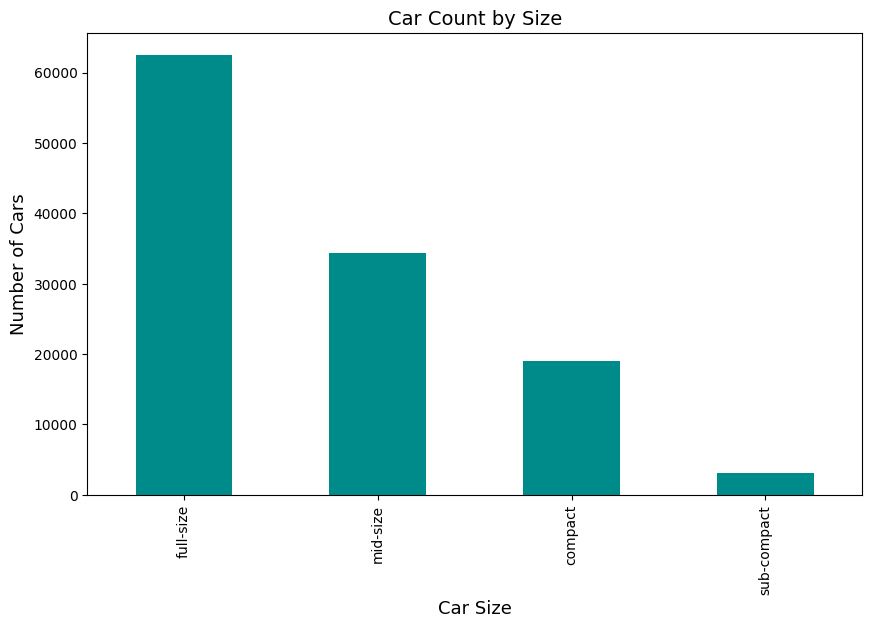

In [34]:
size_count = df['size'].value_counts()

plt.figure(figsize=(10, 6), dpi=100)
size_count.plot(kind='bar', color='darkcyan')
plt.xlabel('Car Size', fontsize=13)
plt.ylabel('Number of Cars', fontsize=13)
plt.title('Car Count by Size', fontsize=14)
plt.show()
